In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import matplotlib

matplotlib.rcParams['figure.figsize'] = (6, 6)
matplotlib.rcParams['image.cmap'] = 'gray'

DATA_PATH = "/Users/admin/Iqbal/Study/OpenCV/LearnOpenCV/src/res/opencv-courses/"

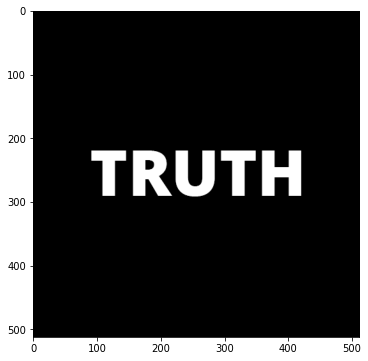

In [3]:
im = cv2.imread(DATA_PATH + "images/truth.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(im)
# print(im)

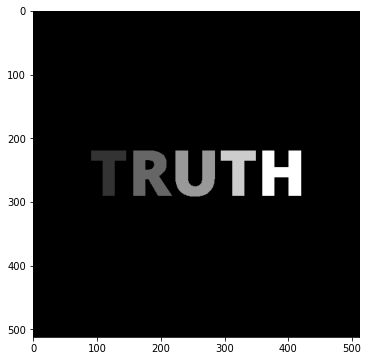

In [4]:
th, imThresh = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)
# print(imThresh)

_, imLabels = cv2.connectedComponents(imThresh)
plt.imshow(imLabels)
# print(imLabels)

/var/folders/nj/yfdjzlhj4ng_ndb0wp1g5rcm0000gn/T/ipykernel_11728/1101753562.py:5: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(displayRows, 3, i + 1)


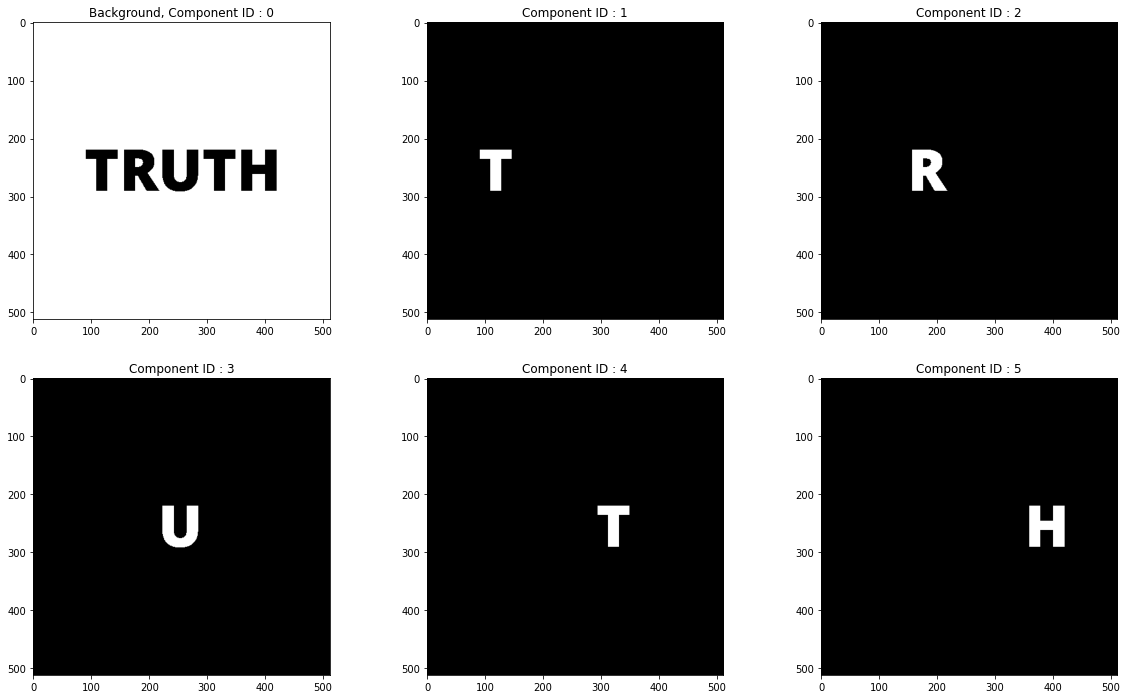

In [5]:
nComponents = imLabels.max()
displayRows = np.ceil(nComponents / 3.0)
plt.figure(figsize=[20, 12])
for i in range(nComponents + 1):
    plt.subplot(displayRows, 3, i + 1)
    localVar = imLabels == i
    plt.imshow(localVar)
    if i == 0:
        plt.title("Background, Component ID : {}".format(i))
    else:
        plt.title("Component ID : {}".format(i))

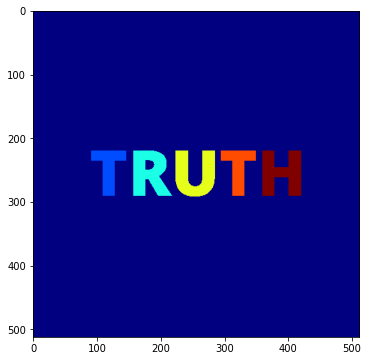

In [6]:
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(imLabels)

#Normalize the image so that the min value is 0 and max value is 1
imLabels = 255 * (imLabels - minVal)/(maxVal - minVal)

imLabels = np.uint8(imLabels)

imColorMap = cv2.applyColorMap(imLabels,cv2.COLORMAP_JET)
plt.imshow(imColorMap[...,::-1])